In [1]:
import torch
import espaloma as esp


In [38]:
g = esp.Graph.load("mols_with_high_rmse/1")

In [39]:
def view(idx):
    from rdkit.Geometry import Point3D
    from rdkit import Chem
    from rdkit.Chem import AllChem
    import py3Dmol

    mol = g.mol.to_rdkit()
    AllChem.EmbedMultipleConfs(mol, numConfs=1)
    conf = mol.GetConformer(0)
    for i in range(mol.GetNumAtoms()):
        x,y,z = g.nodes['n1'].data['xyz'].double().detach().numpy()[i, idx]
        conf.SetAtomPosition(i, Point3D(x,y,z))
    mblock = Chem.MolToMolBlock(mol)
    viewer = py3Dmol.view(600, 600)
    viewer.clear()
    viewer.addModel(mblock, 'mol')
    viewer.setStyle("stick")
    viewer.zoomTo()
    viewer.show()
    


In [40]:
from ipywidgets import interact,fixed,IntSlider

interact(view, idx=IntSlider(min=0, max=40, step=1))

interactive(children=(IntSlider(value=0, description='idx', max=40), Output()), _dom_classes=('widget-interact…

<function __main__.view(idx)>

In [41]:
ff = esp.graphs.legacy_force_field.LegacyForceField()
ff.typing(g)

In [42]:
print([ff._idx_2_str[t.item()] for t in g.nodes['n1'].data['legacy_typing']])

['cc', 'cc', 'c', 'n2', 'n2', 'na', 'na', 'n', 'na', 'o', 'os', 'h4', 'h4', 'hn', 'hn']


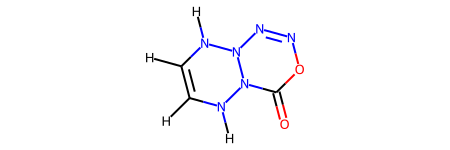

In [43]:
g.mol